# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Занятие 2. Введение в машинное обучение. Линейная регрессия.

*Примечание.* Подробнее про работу с различными библиотеками Питона можно посмотреть в наших <a target="_blank" href="https://mipt-stats.gitlab.io/courses/python.html">туториалах</a>.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Пример построения линейной регрессии

Скачаем данные, полученные из книги <a href="https://mipt.ru/education/chair/physics/kmf/mPh_4/f_5yrle6.pdf
">"Модели и концепции физики: механика.
Лабораторный практикум.
Обработка результатов измерений."</a>

In [2]:
data = pd.read_csv("lab_data.csv", index_col='Unnamed: 0')  

Посмотрим на данные

In [3]:
data

,n,h,T,I
0,1.0,0.0,2.48,1.78
1,2.0,0.5,2.47,1.74
2,3.0,1.0,2.50,1.86
3,4.0,1.5,2.54,2.00
4,5.0,2.0,2.62,2.30
5,6.0,2.5,2.71,2.63
6,7.0,3.0,2.79,2.97
7,8.0,3.5,2.91,3.46
8,9.0,4.0,3.05,4.07
9,10.0,4.5,3.16,4.56


Нас интересуют столбцы `data.I` — измерения момента инерции, `data.h` — измерения расстояния до оси вращения.

По данным хотим оценить параметры $m, I_0$ в модели $I = I_0 + m h^2 +\varepsilon$.



Заведем модель <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
">линейной регрессии </a>из библиотеки `sklearn`:

`sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)`
* Параметр `fit_intercept` отвечает за то, нужно ли включать в модель свободный член. В случае `fit_intercept=True` модели не нужно передавать признак из всех единиц для того, чтобы она оценивала свободный член.
По умолчанию `fit_intercept=True`.
* Параметр `normalize=False` отвечает за то, нужно ли сделать нормализацию данных.


В нашем случае свободный член — это $I_0$.

In [4]:
lin = LinearRegression(fit_intercept=True)

Обучим модель. Для этого используем функцию `lin.fit(X, y)`

* `X` — матрица размера `n_samples` $\times$ `n_features`;
* `y` — стоблец размера `n_samples` (матрица `n_samples` $\times$ 1).

Сформируем матрицу признаков $X$ из значений квадрата расстояния $h^2$ для каждого измерения.
Массив `data.h**2` одномерный поскольку у нас всего один признак, поэтому нужно изменить его `shape` для того, чтобы можно было подать на вход функции `fit`.

In [5]:
X = np.array(data.h**2).reshape(-1, 1) 

Отдельно выделим целевую переменную $I$

In [6]:
y = data.I

Обучаем линейную регрессию

In [7]:
lin = lin.fit(X, y)

напечатаем массив коэффициентов. В данном случаем только один коэффициент




In [8]:
lin.coef_

array([0.14196886])

Свободный член:

In [9]:
lin.intercept_

1.7263600917431186

In [10]:
print(f"Оценка I_0: {lin.intercept_ :.4}")
print(f"Оценка m: {lin.coef_[0] :.4}")

Оценка I_0: 1.726
Оценка m: 0.142


Предсказание:

In [11]:
y_pred = lin.predict(X)

In [12]:
print(y_pred)

[1.72636009 1.76185231 1.86832895 2.04579003 2.29423554 2.61366548
 3.00407985 3.46547865 3.99786188 4.60122954 5.27558163 6.02091815
 6.83723911 7.72454449 8.68283431]


Построим предсказание на новых объектах. В данном случае в качестве новых объектов возьмем сетку чисел, используемую для построения графика.

In [13]:
grid = np.arange(-1, 53).reshape(-1, 1)  # Нужный размер вектора-столбца

y_pred_grid = lin.predict(grid)

Посмотрим на график зависимости

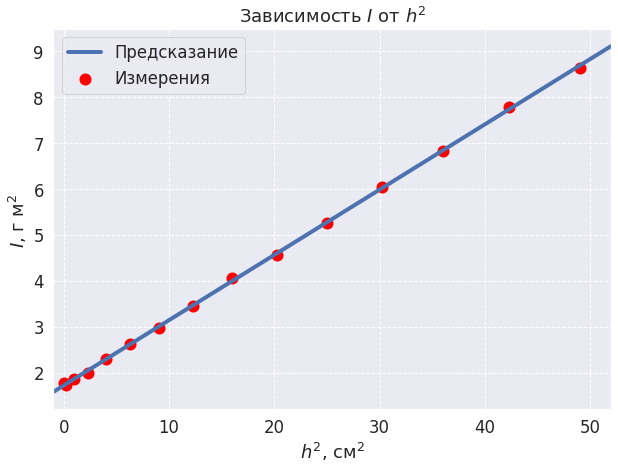

In [14]:
plt.figure(figsize=(10, 7))

plt.scatter(data.h**2, data.I, color='red', linewidths=6, label="Измерения")

plt.plot(grid, y_pred_grid, linewidth=4, label="Предсказаниe")

# вспомогательные функции построения графика
plt.xlabel("$h^2$, см$^2$")
plt.ylabel("$I$, г м$^2$ ")
plt.title("Зависимость $I$ от $h^2$")
plt.legend()
plt.grid(linestyle='--')
plt.xlim((-1, 52))
plt.show()

Посчитаем различные метрики качества:

In [15]:
print(f"MSE: {mean_squared_error(y, y_pred) :.3}")
print(f"MAE: {mean_absolute_error(y, y_pred) :.3}")

MSE: 0.00149
MAE: 0.0323


### Переобучение и недообучение

Создадим сетку из 10 равноудаленных точек на отрезке от 0 до 1.

In [16]:
x = np.linspace(0, 1, 10) 

Предположим, что истинная зависимость имеет вид $$y(x) = 5 x - 6 x^2.$$

Данные получаются по следующему принципу
$$y_i = 5 x_i - 6 x^2_i + \varepsilon_i,$$
$$\varepsilon_i \sim \mathcal{N}(0, 0.25).$$

Получим искусственно эти данные. Обратите внимание, что в параметрах нормального распределения в коде указывается не дисперсия, а стандартное отклонение, которое равно корню из дисперсии.

In [17]:
y = 5 * x - 6 * x**2 + sps.norm(loc=0, scale=0.5).rvs(size=10)

Построим график полученных данных

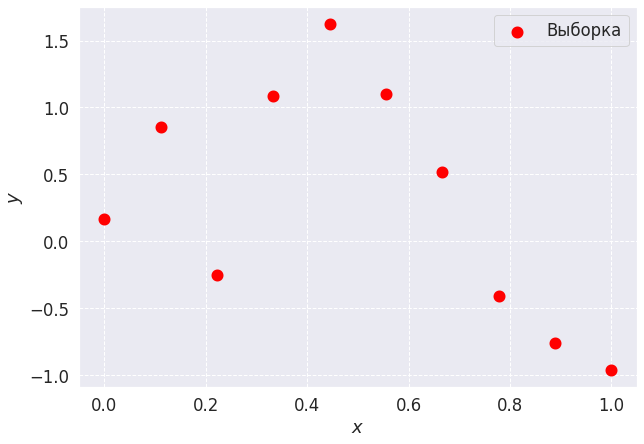

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, linewidths=6, color='red', label="Выборка")

plt.xlabel("$x$")
plt.ylabel("$y$ ")
plt.legend()
plt.grid(linestyle='--')
plt.show()

**1.** Обозначим $\bar x = (x_1, \ldots x_n)^T$, $\bar 1 = (1, \ldots 1)^T$.

Обучим первую модель линейной регрессии, которая в матричном виде записывается как
$$Y = X\theta + \varepsilon,$$
где 
* $X = (\bar 1, \bar x)$ — константный признак и $x$;
* $\theta = (\theta_0, \theta_1)$ — вектор из двух коэффициентов.


In [19]:
X1 = np.array(x).reshape(-1, 1)

lin1 = LinearRegression()
lin1.fit(X1, y)

LinearRegression()

Построим предсказания по сетке

In [20]:
grid = np.linspace(0, 1, 100)  # сетка для построения графика предсказания
grid1 = grid.reshape(-1, 1)  # переведем ее в нужный размер
y_pred1 = lin1.predict(grid1)

Визуализируем их на графике

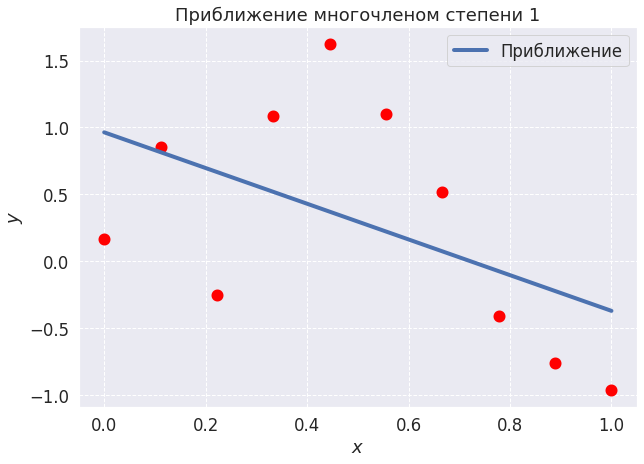

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, linewidths=6, color = 'red')

plt.plot(grid, y_pred1, linewidth = 4, label="Приближение")

plt.title("Приближение многочленом степени 1")
plt.xlabel("$x$")
plt.ylabel("$y$ ")
plt.legend()
plt.grid(linestyle='--')
plt.show()

**Недообучение!** В данном случае мы обучили слишком простую модель, которая не смогла уловить все закономерности в данных.

**2.**  Обучим вторую модель линейной регрессии, которая в матричном виде записывается как
$$Y = X\theta + \varepsilon,$$
где 
* $X = (\bar 1, \bar x, \bar x^2, \ldots \bar x^{10})$ — константный признак и первые 10 степеней признака $x$;
* $\theta = (\theta_0, \theta_1, \theta_2, \ldots \theta_10)$ — вектор коэффициентов.

In [22]:
X2 = np.array([x**k for k in range(1, 11)]).T  # создаем все степени признака

lin2 = LinearRegression()
lin2.fit(X2, y)

LinearRegression()

Построим предсказания по сетке

In [23]:
grid2 = np.array([grid**k for k in range(1, 11)]).T  # признаки для объектов сетки
y_pred2 = lin2.predict(grid2)

Визуализируем их на графике

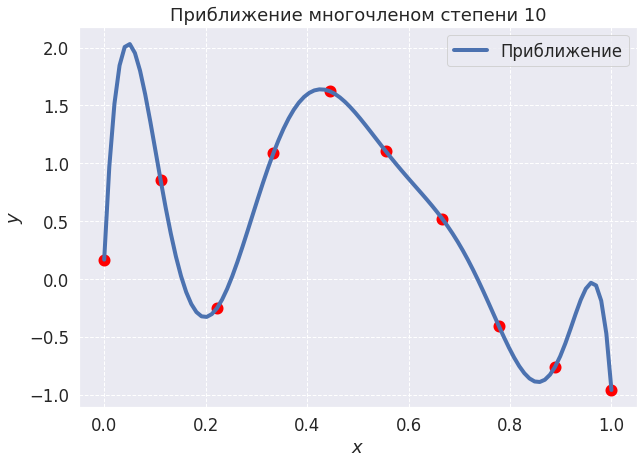

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, linewidths=6, color = 'red')

plt.plot(grid, y_pred2, linewidth = 4, label="Приближение")

plt.title("Приближение многочленом степени 10")
plt.xlabel("$x$")
plt.ylabel("$y$ ")
plt.legend()
plt.grid(linestyle='--')
plt.show()

**Переобучение!** В данном случае модель слишком сложная, она обучилась закономерностям, которых нет в обучающих данных.

**3.**  Обучим третью модель линейной регрессии, которая в матричном виде записывается как
$$Y = X\theta + \varepsilon,$$
где 
* $X = (\bar 1, \bar x, \bar x^2)$ — константный признак и первые две степени признака $x$;
* $\theta = (\theta_0, \theta_1, \theta_2)$ — вектор коэффициентов.


In [25]:
X3 = np.array([x**k for k in range(1, 3)]).T # создаем все степени признака

lin3 = LinearRegression()
lin3.fit(X3, y)

LinearRegression()

Построим предсказания по сетке

In [26]:
grid3 = np.array([grid**k for k in range(1, 3)]).T  # признаки для объектов сетки
y_pred3 = lin3.predict(grid3)

Визуализируем их на графике

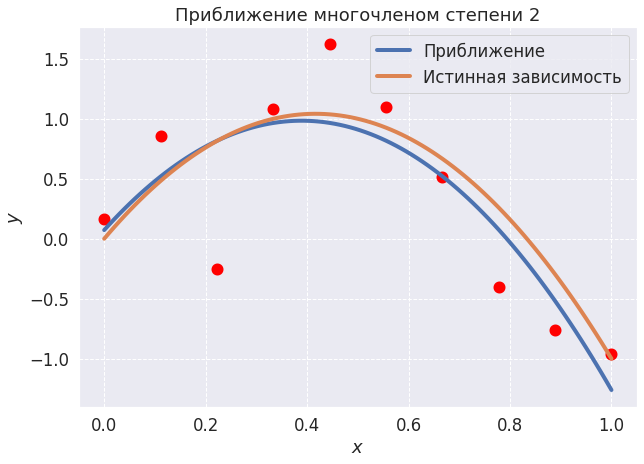

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, linewidths=6, color = 'red')
grid = np.linspace(0, 1, 100)
plt.plot(grid, y_pred3, linewidth = 4, label="Приближение")
plt.plot(grid, 5* grid - 6* grid**2, linewidth = 4, label="Истинная зависимость")
plt.title("Приближение многочленом степени 2")
plt.xlabel("$x$")
plt.ylabel("$y$ ")
plt.legend()
plt.grid(linestyle='--')
plt.show()


Зависимость не так уж плохо приближена.

**Вывод.**

Стоит выбирать некоторый оптимум между простыми и сложными моделями. Слишком простые могут недообучиться, не уловив тем самым основные закономерности в данных. Слишком сложные модели могут переобучиться и показывать закономерности, которых нет в обучающих данных.